## DAT200: Compulsory Assignment 2

### Tonje Martine Lorgen Kirkholt

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Loading and exploring the dataset

We start by importing the dataset and observing how this looks like in a table. After this we look at the specific features and what kind of data type each of them are. 

In [2]:
# Loading the dataset which will be used throughout this assignmen
wine_data = pd.read_csv('wine.csv')

# Observing how the data looks like in a table
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,1
1,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1
2,6.6,0.695,0.00,2.1,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,0
3,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
4,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
794,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,0
795,6.9,0.510,0.23,2.0,0.072,13.0,22.0,0.99438,3.40,0.84,11.2,1
796,6.6,0.960,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,1
797,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,0


We see from the table view above that the shape of the data is 799 rows x 12 columns. In other words, we have

* 799 samples
* 12 features

In [3]:
# Verifying the shape
wine_data.shape

(799, 12)

In [4]:
# Observing a more detailed overview of the data.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  class                 799 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 75.0 KB


**To summarize, we have the following features in the dataset:**

* *column 0* = fixed acidity - continuous

* *column 1* = volatile acidity - continuous

* *column 2* = citric acid - continuous

* *column 3* = residual sugar - continuous

* *column 4* = chlorides - continuous

* *column 5* = free sulfur dioxide - continuous

* *column 6* = total sulfur dioxide - continuous

* *column 7* = density - continuous

* *column 8* = pH - continuous

* *column 9* = sulphates - continuous

* *column 10* = alcohol - continuous

* *column 11* = Class variable (1: wine class 1, 0: wine class 0) - categorical

## 2. Detecting outliers

We check if there are any outliers present in the dataset.

In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
class                   0
dtype: int64

As observed from the table above, there are no outliers present

## 3. Visualizing the data

In [23]:
wine_data_class = wine_data[['class']]

In [25]:
wine_data_class = pd.DataFrame(wine_data['class'].value_counts().reset_index().values, columns=['class', 'count'])

In [26]:
wine_data_class

,class,count
0,1,427
1,0,372


<AxesSubplot:xlabel='class', ylabel='count'>

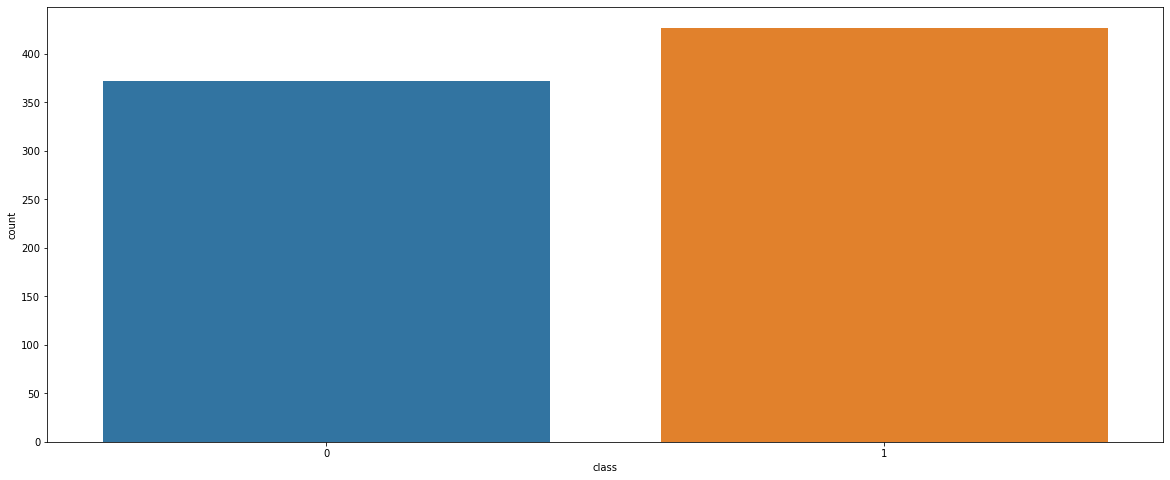

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=wine_data_class, x='class', y='count')

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

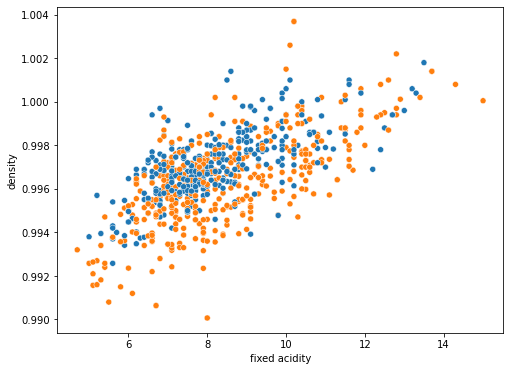

In [45]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.scatterplot(data=wine_data, x='fixed acidity', y ='density', hue='class', legend=False, ax=ax)

<AxesSubplot:>

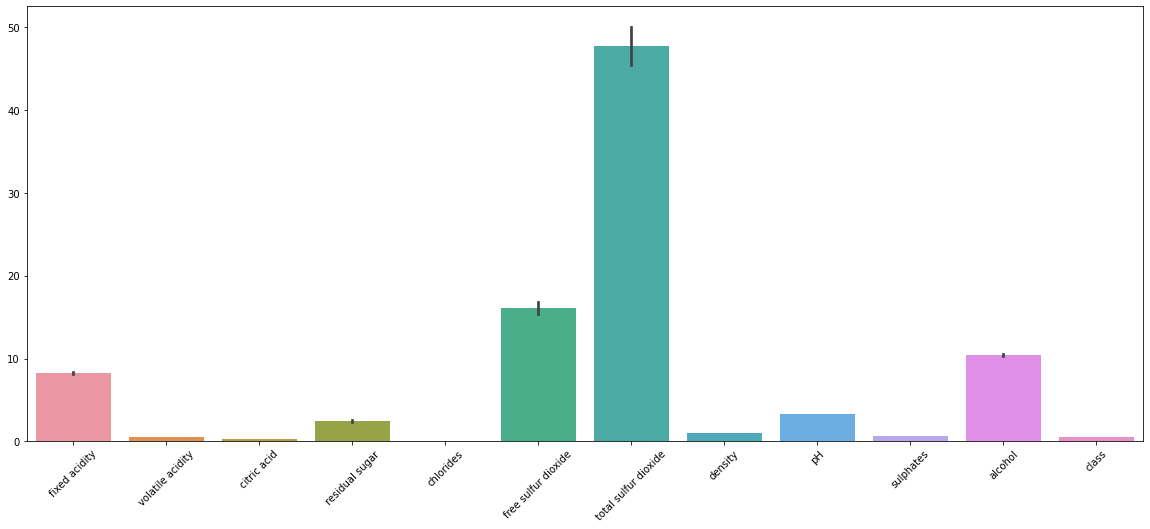

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)
sns.barplot(data=wine_data, x)

<AxesSubplot:>

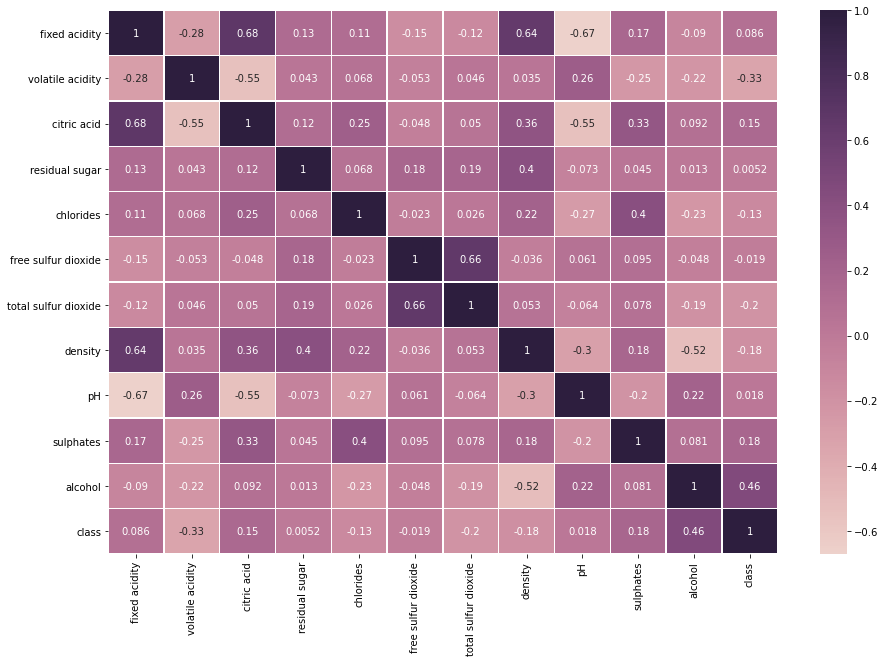

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(wine_data.corr(), annot=True, linewidth=.3, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

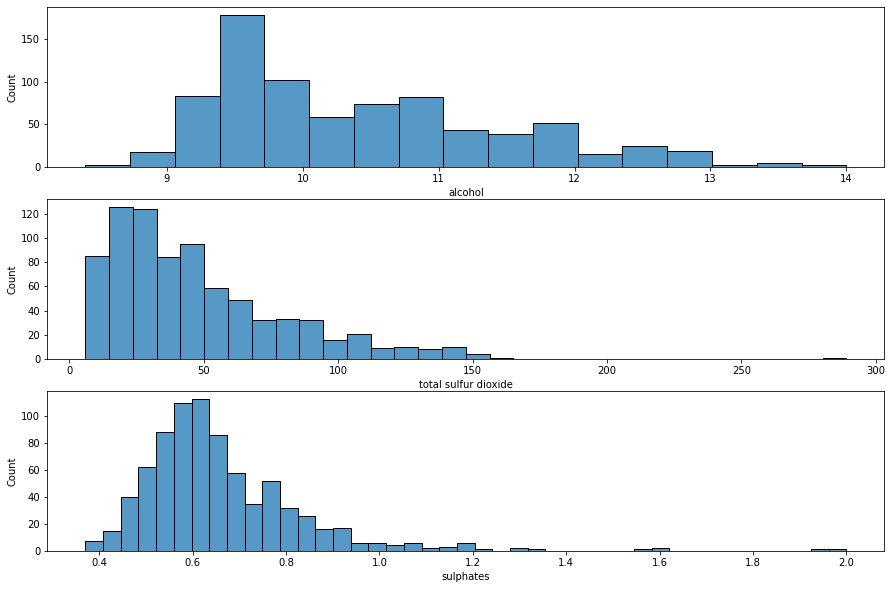

In [52]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))
sns.histplot(data=wine_data['alcohol'], ax=ax[0])
sns.histplot(data=wine_data['total sulfur dioxide'], ax=ax[1])
sns.histplot(data=wine_data['sulphates'], ax=ax[2])